In [1]:
import pandas as pd
import nltk
import os
import numpy as np
import json
import seaborn as sns
import gensim
import requests
import string

from IPython.display import Image
from sklearn.manifold import TSNE

In [2]:
crime_type_df = pd.read_csv('crime_type_df.csv')

In [3]:
crime_type_df = crime_type_df.rename(columns = {'crime type' : 'crime_type'})

In [4]:
crime_type_df.columns.to_list()

['Unnamed: 0',
 'Unnamed: 0.1',
 'id',
 'conversation_id',
 'referenced_tweets.replied_to.id',
 'referenced_tweets.retweeted.id',
 'referenced_tweets.quoted.id',
 'author_id',
 'in_reply_to_user_id',
 'in_reply_to_username',
 'retweeted_user_id',
 'retweeted_username',
 'quoted_user_id',
 'quoted_username',
 'created_at',
 'text',
 'lang',
 'source',
 'public_metrics.impression_count',
 'public_metrics.reply_count',
 'public_metrics.retweet_count',
 'public_metrics.quote_count',
 'public_metrics.like_count',
 'reply_settings',
 'edit_history_tweet_ids',
 'edit_controls.edits_remaining',
 'edit_controls.editable_until',
 'edit_controls.is_edit_eligible',
 'possibly_sensitive',
 'withheld.scope',
 'withheld.copyright',
 'withheld.country_codes',
 'entities.annotations',
 'entities.cashtags',
 'entities.hashtags',
 'entities.mentions',
 'entities.urls',
 'context_annotations',
 'attachments.media',
 'attachments.media_keys',
 'attachments.poll.duration_minutes',
 'attachments.poll.end_dat

# Linear Regression : change in neg_sent_score over time

In [5]:
crime_type_df['created_at'] = crime_type_df['created_at'].apply(lambda x: pd.to_datetime(x))

In [6]:
import datetime
crime_type_df['created_at_num'] = crime_type_df['created_at'].apply(lambda x: x.strftime("%Y%m%d"))

In [7]:
crime_type_df['created_at_num']

0       20230131
1       20230131
2       20230131
3       20230131
4       20230131
          ...   
3293    20230406
3294    20230406
3295    20230406
3296    20230406
3297    20230406
Name: created_at_num, Length: 3298, dtype: object

In [8]:
violent_crime = crime_type_df.loc[crime_type_df['crime_type'] == 'violent crime'].reset_index()
property_crime = crime_type_df.loc[crime_type_df['crime_type'] == 'property crime'].reset_index()
organised_crime = crime_type_df.loc[crime_type_df['crime_type'] == 'organised crime'].reset_index()
armed_activity = crime_type_df.loc[crime_type_df['crime_type'] == 'armed activity'].reset_index()
white_collar_crime = crime_type_df.loc[crime_type_df['crime_type'] == 'white collar crime'].reset_index()

In [9]:
from sklearn.linear_model import LinearRegression
# for violent crime
X = np.array(list(violent_crime['created_at_num'].astype(int))).reshape(-1, 1)
y = list(violent_crime['neg_sent_score'])

lr1 = LinearRegression()
lr1.fit(X, y)
print(lr1.intercept_, lr1.coef_, lr1.score(X, y))

6101.2265663572425 [-0.00030158] 0.07815136810572165


In [10]:
# for property crime
X = np.array(list(property_crime['created_at_num'].astype(int))).reshape(-1, 1)
y = list(property_crime['neg_sent_score'])

lr2 = LinearRegression()
lr2.fit(X, y)
print(lr2.intercept_, lr2.coef_, lr2.score(X, y))

1164.7943403066226 [-5.75689765e-05] 0.0026032143383397655


In [11]:
# for white collar crime
X = np.array(list(white_collar_crime['created_at_num'].astype(int))).reshape(-1, 1)
y = list(white_collar_crime['neg_sent_score'])

lr3 = LinearRegression()
lr3.fit(X, y)
print(lr3.intercept_, lr3.coef_, lr3.score(X, y))

4296.659037244519 [-0.00021238] 0.024841856458901357


In [12]:
# for armed activity
X = np.array(list(armed_activity['created_at_num'].astype(int))).reshape(-1, 1)
y = list(armed_activity['neg_sent_score'])

lr4 = LinearRegression()
lr4.fit(X, y)
print(lr4.intercept_, lr4.coef_, lr4.score(X, y))

-1311.730766409438 [6.48483572e-05] 0.0033349731867825527


In [13]:
# for organised crime
X = np.array(list(organised_crime['created_at_num'].astype(int))).reshape(-1, 1)
y = list(organised_crime['neg_sent_score'])

lr5 = LinearRegression()
lr5.fit(X, y)
print(lr5.intercept_, lr5.coef_, lr5.score(X, y))

1205.9822494363093 [-5.96077054e-05] 0.0017564801155273146


In [14]:
crime_type = crime_type_df['crime_type'].unique()

coefficients = [lr5.coef_[0], lr1.coef_[0], lr3.coef_[0], lr2.coef_[0], lr4.coef_[0]]
pd.DataFrame(index = crime_type, data = coefficients).rename(columns = {0 : 'Slope Values'}).sort_values(by = 'Slope Values')


,Slope Values
violent crime,-0.000302
white collar crime,-0.000212
organised crime,-0.000060
property crime,-0.000058
armed activity,0.000065


# Do certain crimes evoke different intensities of fear?

In [15]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [16]:
'neg_sent_score ~  crime type'

'neg_sent_score ~  crime type'

In [17]:
logreg = smf.logit(formula = 'neg_sent_score ~  crime_type', data = crime_type_df).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.275780
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         neg_sent_score   No. Observations:                 3298
Model:                          Logit   Df Residuals:                     3293
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  -62.06
Time:                        14:56:57   Log-Likelihood:                -909.52
converged:                       True   LL-Null:                       -14.422
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.5906      0.179     -8.90

* organised crime and white collar crime is significant in predicting negative sentiment

# Which kinds of crime are more proximate to fear-related sentiment?

# word2vec


In [18]:
from nltk.tokenize import word_tokenize

In [19]:
# removing emojis
import re
text = 'man 👨🏻 vs bus 🚌 #sanfrancisco #california housing issue it’s drug infection need treated #cleanup @fema @potus @vp @gavinnewsom @londonbreed @sfbos @sfpdchief @sfmta_muni @petebuttigieg @scott_wiener @speakerpelosi @senfeinstein #republicans #democrats #help https://t.co/jwewotbimu'
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

man 👨🏻 vs bus 🚌 #sanfrancisco #california housing issue it’s drug infection need treated #cleanup @fema @potus @vp @gavinnewsom @londonbreed @sfbos @sfpdchief @sfmta_muni @petebuttigieg @scott_wiener @speakerpelosi @senfeinstein #republicans #democrats #help https://t.co/jwewotbimu
man  vs bus  #sanfrancisco #california housing issue it’s drug infection need treated #cleanup @fema @potus @vp @gavinnewsom @londonbreed @sfbos @sfpdchief @sfmta_muni @petebuttigieg @scott_wiener @speakerpelosi @senfeinstein #republicans #democrats #help https://t.co/jwewotbimu


In [20]:
crime_type_df['cleaned_tweet']

0       spent day tenderloin. talked lot people street...
1       spent day tenderloin. talked lot people street...
2       spent day tenderloin. talked lot people street...
3       spent day tenderloin. talked lot people street...
4       spent day tenderloin. talked lot people street...
                              ...                        
3293    stranger things x📖of eli\nconnor discovers tec...
3294    stranger things x📖of eli\nconnor discovers tec...
3295    stranger things x📖of eli\nconnor discovers tec...
3296    stranger things x📖of eli\nconnor discovers tec...
3297    tomb raider space\n\nlexa's skills include:\n-...
Name: cleaned_tweet, Length: 3298, dtype: object

In [21]:
crime_type_df['cleaned_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: emoji_pattern.sub(r'', x))

In [22]:
crime_type_df['cleaned_tweet'][0]#.translate(str.maketrans('', '', string.punctuation))

'spent day tenderloin. talked lot people street. two messages:\\n\\n1. fentanyl killing everyone.\\n\\n2. want get clean sober.\\n@londonbreed @ahsha_safai @supstefani @rafaelmandelman @joelengardio @myrnamelgar #sanfrancisco #recovery https://t.co/wr1p9zt8km'

In [23]:
crime_type_df['cleaned_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [24]:
# remove anything after @
crime_type_df['cleaned_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: re.sub(r'(\s)@\w+', r'\1', x))

In [25]:
# remove hashtage before word (but keep the word) --> actually wanna delete the whole word
crime_type_df['cleaned_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: re.sub(r'(\s)#\w+', r'\1', x))

In [26]:
# remove punctuation
crime_type_df['cleaned_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [27]:
crime_type_df['tokenized_tweet'] = crime_type_df['cleaned_tweet'].apply(lambda x: x.split())

In [28]:
tok_corp = crime_type_df['tokenized_tweet'].to_list()

In [29]:
model = gensim.models.Word2Vec(tok_corp, min_count=1, vector_size = 16, window=5)


In [30]:
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.index_to_key)[:10]}')

Corpus Size: 62057
Corpus Count: 3298
Training time: 0.17502337228506804
Sample words: ['fentanyl', 'amp', 'kill', 'drug', 'x', 'people', 'star', 'want', 'wants', 'n']


In [31]:
unique_words = list(set([item for sublist in tok_corp for item in sublist]))

In [32]:
unique_words

['nneverything',
 'rioters',
 'respect',
 'blood',
 'gatsby',
 'mexicanntrans',
 'homes',
 'nbut',
 'blown',
 'whistle',
 'hold',
 'crown',
 'discovery',
 'scientist',
 'century',
 'wizardninterdimensional',
 'unit',
 'stranger',
 'percentage',
 'knew',
 'charity',
 'services',
 'apocalypseand',
 'side',
 'innnmacys',
 'corps',
 'takes',
 'support',
 'prevent',
 'colonys',
 'acts',
 'tickets',
 'mouths',
 'gunna',
 'montana',
 'drove',
 'eeaaonnarrested',
 'nand',
 'condo',
 'misguided',
 'collapsing',
 'mention',
 'gives',
 'museum',
 'ntitles',
 'linked',
 'dredging',
 'resistant',
 'etc',
 'transform',
 'up',
 'emphasis',
 'his',
 'loop',
 'wchildren',
 'havent',
 'sent',
 'searching',
 'comments',
 'winterest',
 'packed',
 'powernnsf',
 'lines',
 'rare',
 'nmorally',
 'mcsncompit',
 'questionsrobbery',
 'childhood',
 'addict',
 'concerned',
 'illuminaecindernn13yo',
 'sometimes',
 'peskin',
 'slashed',
 'sessionnnapparently',
 'transportation',
 'then',
 'heart',
 'planetdestroying

In [33]:
vector_list = model.wv[unique_words]

In [34]:
vector_list

array([[-6.9125324e-02, -2.1064963e-02, -8.0674514e-02, ...,
        -2.0031160e-01,  3.7705172e-02,  6.4340204e-02],
       [-4.3451890e-02, -4.8855934e-02,  1.5916899e-02, ...,
        -2.0564510e-02, -2.3733601e-02,  5.4586258e-02],
       [-5.8148965e-02,  3.2207705e-02, -5.0206785e-03, ...,
        -1.7467976e-01,  3.7756678e-02, -2.6680728e-02],
       ...,
       [-8.5417606e-02, -1.6349165e-02, -3.1360094e-02, ...,
        -1.2204721e-01,  6.6900879e-02,  1.7460786e-02],
       [-9.5852301e-02,  3.6971800e-02, -5.5584904e-02, ...,
        -4.5513604e-02,  1.5829626e-02,  1.4661780e-02],
       [-1.2535791e-01, -3.5291892e-02, -1.3095938e-04, ...,
        -1.4666744e-01,  4.2080205e-02,  4.6258796e-02]], dtype=float32)

# Visualizing the Trained Vectors

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Run K-means clustering on word vectors

In [37]:
sse = []
X = np.array(vector_list)
for i in range(1,10):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

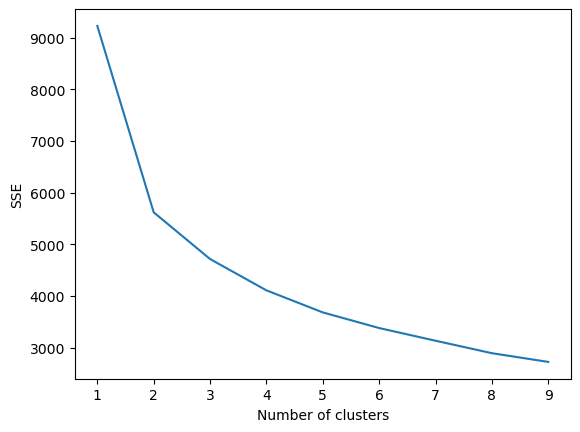

In [38]:
plt.plot(range(1,10),sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show() 

In [39]:
# optimal k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
X = np.array(vector_list)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [43]:
from sklearn.manifold import TSNE
data_embed = TSNE(n_components=2, perplexity=50, verbose=2,
                  method='barnes_hut').fit_transform(vector_list)


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4898 samples in 0.000s...
[t-SNE] Computed neighbors for 4898 samples in 0.497s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4898
[t-SNE] Computed conditional probabilities for sample 2000 / 4898
[t-SNE] Computed conditional probabilities for sample 3000 / 4898
[t-SNE] Computed conditional probabilities for sample 4000 / 4898
[t-SNE] Computed conditional probabilities for sample 4898 / 4898
[t-SNE] Mean sigma: 0.069783
[t-SNE] Computed conditional probabilities in 0.221s
[t-SNE] Iteration 50: error = 78.8224258, gradient norm = 0.0421488 (50 iterations in 1.094s)
[t-SNE] Iteration 100: error = 72.4616776, gradient norm = 0.0055565 (50 iterations in 0.828s)
[t-SNE] Iteration 150: error = 72.0101013, gradient norm = 0.0009178 (50 iterations in 0.736s)
[t-SNE] Iteration 200: error = 71.9289169, gradient norm = 0.0001750 (50 iterations in 0.701s)
[t-SNE] Iteration 250: error = 71.9141922, gradient norm = 0.000101

In [44]:
pip install bhtsne

  Using cached bhtsne-0.1.9-cp39-cp39-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [45]:
from bhtsne import tsne
data_nd_tsne = tsne(vector_list.astype('float64'))

In [46]:
data_nd_tsne

array([[-15.85148453,   8.5260985 ],
       [ 13.64746311,  19.77498274],
       [ -8.47631278,  11.96403343],
       ...,
       [  9.29788951,  -5.83389187],
       [ 15.45439047,  11.62570032],
       [ -8.69632117,   3.93926573]])

In [47]:
import matplotlib.pyplot as plt

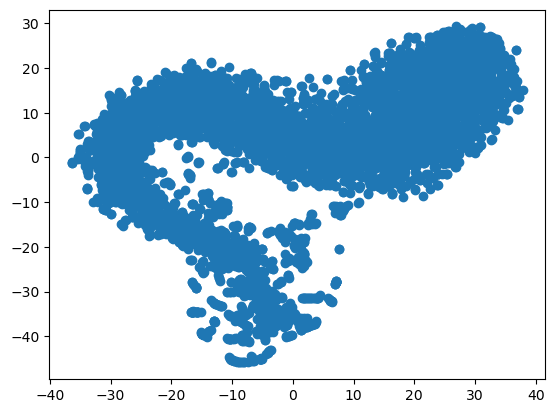

In [48]:
plt.scatter(data_nd_tsne[:, 0], data_nd_tsne[:, 1])#, c=iris.target)
plt.show()

In [49]:
df = pd.DataFrame(data_nd_tsne[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,-15.851485,8.526098,nneverything,1
1,13.647463,19.774983,rioters,1
2,-8.476313,11.964033,respect,1
3,19.295956,13.432720,blood,1
4,0.238796,-14.751006,gatsby,1


<AxesSubplot:xlabel='x', ylabel='y'>

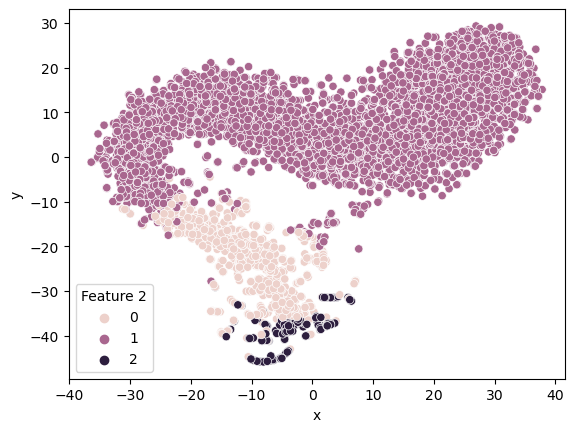

In [50]:
sns.scatterplot(data=df, x="x", y="y", hue="Feature 2")

In [51]:
df

,x,y,Feature 1,Feature 2
0,-15.851485,8.526098,nneverything,1
1,13.647463,19.774983,rioters,1
2,-8.476313,11.964033,respect,1
3,19.295956,13.432720,blood,1
4,0.238796,-14.751006,gatsby,1
...,...,...,...,...
4893,13.426387,7.065810,mcsnncompit,1
4894,16.015615,18.272424,panda,1
4895,9.297890,-5.833892,came,1
4896,15.454390,11.625700,bellwether,1


In [52]:
df.loc[df['Feature 2'] == 0]

,x,y,Feature 1,Feature 2
6,-20.884680,-14.814278,homes,0
13,-15.001522,-39.431038,scientist,0
23,-4.831707,-29.769405,side,0
26,-23.916508,-12.599215,takes,0
27,-12.254214,-16.440946,support,0
...,...,...,...,...
4862,-9.686193,-19.849667,black,0
4873,-3.677417,-32.843824,me,0
4879,-10.956881,-11.166244,caught,0
4888,-20.486112,-13.595417,russianspeaking,0


In [53]:
df.loc[df['Feature 2'] == 1]

,x,y,Feature 1,Feature 2
0,-15.851485,8.526098,nneverything,1
1,13.647463,19.774983,rioters,1
2,-8.476313,11.964033,respect,1
3,19.295956,13.432720,blood,1
4,0.238796,-14.751006,gatsby,1
...,...,...,...,...
4893,13.426387,7.065810,mcsnncompit,1
4894,16.015615,18.272424,panda,1
4895,9.297890,-5.833892,came,1
4896,15.454390,11.625700,bellwether,1


In [54]:
df.loc[df['Feature 2'] == 2]

,x,y,Feature 1,Feature 2
78,-10.273132,-45.043711,planetdestroying,2
81,2.469958,-31.492140,remote,2
87,3.082480,-37.388881,community,2
105,-3.801638,-39.123983,must,2
114,-5.156842,-36.888510,find,2
...,...,...,...,...
4820,2.476785,-37.650065,lot,2
4827,-5.025113,-45.070594,delete,2
4834,3.014814,-37.536792,day,2
4845,2.457219,-37.797077,people,2


* distinct clusters not formed from clustering algorithm --> may merit further exploration of topic identification with LDA?

# find which crime-related words closest to fear-related words

In [56]:
df.loc[df['Feature 1'] == 'fear']

,x,y,Feature 1,Feature 2
2038,-30.15531,-7.573603,fear,1


In [69]:
df.loc[df['Feature 1'] == 'scary']

,x,y,Feature 1,Feature 2
1302,-23.49392,6.516879,scary,1


In [59]:
df.loc[df['Feature 1'] == 'horror']

,x,y,Feature 1,Feature 2
400,-8.2432,-23.036597,horror,0


In [60]:
df.loc[df['Feature 1'] == 'horrified']

,x,y,Feature 1,Feature 2
299,29.659808,19.39003,horrified,1


In [61]:
df.loc[df['Feature 1'] == 'worry']

,x,y,Feature 1,Feature 2
2181,-29.357087,1.209364,worry,1


In [63]:
df.loc[df['Feature 1'] == 'shocked']

,x,y,Feature 1,Feature 2
316,-31.636763,-4.099331,shocked,1


In [64]:
df.loc[df['Feature 1'] == 'mad']

,x,y,Feature 1,Feature 2
2108,-15.426266,-24.528881,mad,0


In [66]:
df.loc[df['Feature 1'] == 'angry']

,x,y,Feature 1,Feature 2
1273,-15.046233,-20.016101,angry,0


In [72]:
# have df of crime words and their vectors
# filter df with only crime words
crime_type_df = pd.read_csv('crime_type_df.csv')
crime_words = crime_type_df['crime word'].unique()
crime_word_vectors = df.loc[df['Feature 1'].isin(crime_words)]
crime_word_vectors = crime_word_vectors.rename(columns = {'Feature 1' : 'crime word'})

# merge with the crime type column
vector_crime_df = pd.merge(crime_word_vectors, crime_type_df[['crime word', 'crime type']], on = 'crime word'). drop_duplicates()
vector_crime_df = vector_crime_df.reset_index(drop = True)

tuples = []
for i in range(len(vector_crime_df)):
    tuples.append(tuple((vector_crime_df['x'][i], vector_crime_df['y'][i])))
vector_crime_df['vectors'] = tuples

vector_crime_df


,x,y,crime word,Feature 2,crime type,vectors
0,-31.062531,-1.974464,corps,1,violent crime,"(-31.06253084868248, -1.974464169909165)"
1,-32.249169,-1.084579,fraud,1,white collar crime,"(-32.249168613029475, -1.0845790541016374)"
2,24.200666,11.571902,offend,1,violent crime,"(24.20066592527748, 11.571902452308864)"
3,-7.896744,-23.804498,fatal,0,violent crime,"(-7.896744131888889, -23.804497568773048)"
4,-5.358115,-39.452801,violent,2,violent crime,"(-5.358115389621377, -39.45280122031177)"
5,-0.920255,-37.401504,victim,2,violent crime,"(-0.920254733892048, -37.401503787941614)"
6,-5.842640,-33.787919,arm,0,armed activity,"(-5.842640143021113, -33.78791945464877)"
7,-9.712567,-23.849840,wreck,0,property crime,"(-9.712567107841936, -23.84984036828886)"
8,-8.025104,-37.159783,thief,0,property crime,"(-8.025104434854736, -37.15978315688037)"
9,5.868242,4.513055,punch,1,violent crime,"(5.868242425175492, 4.513054615052748)"


In [93]:
fear_words = ['fear', 'nervous', 'dread', 'horror', 'horrified', 'worry', 'shocked', 'worried', 'angry', 'scary', 'mad']
fear_words_df = df.loc[df['Feature 1'].isin(fear_words)]
fear_words_df = fear_words_df.rename(columns = {'Feature 1' : 'crime word'})
fear_words_df['crime type'] = 'fear words'
fear_words_df = fear_words_df.reset_index(drop = True)

tuples = []
for i in range(len(fear_words_df)):
    tuples.append(tuple((fear_words_df['x'][i], fear_words_df['y'][i])))
fear_words_df['vectors'] = tuples


fear_words_df


,x,y,crime word,Feature 2,crime type,vectors
0,29.659808,19.390030,horrified,1,fear words,"(29.659808024834938, 19.390030177594923)"
1,-31.636763,-4.099331,shocked,1,fear words,"(-31.63676289185364, -4.09933095128511)"
2,-8.243200,-23.036597,horror,0,fear words,"(-8.243200334274897, -23.03659658098004)"
3,-15.046233,-20.016101,angry,0,fear words,"(-15.046233304030977, -20.016100614511313)"
4,-23.493920,6.516879,scary,1,fear words,"(-23.49391957047261, 6.516878661996527)"
5,-30.155310,-7.573603,fear,1,fear words,"(-30.155309751366808, -7.573602720982745)"
6,-15.426266,-24.528881,mad,0,fear words,"(-15.426266187149606, -24.528881370845006)"
7,-29.357087,1.209364,worry,1,fear words,"(-29.357087472877666, 1.209363806109067)"


In [94]:
df_plot = pd.concat([vector_crime_df, fear_words_df]).reset_index(drop = True)
df_plot

,x,y,crime word,Feature 2,crime type,vectors
0,-31.062531,-1.974464,corps,1,violent crime,"(-31.06253084868248, -1.974464169909165)"
1,-32.249169,-1.084579,fraud,1,white collar crime,"(-32.249168613029475, -1.0845790541016374)"
2,24.200666,11.571902,offend,1,violent crime,"(24.20066592527748, 11.571902452308864)"
3,-7.896744,-23.804498,fatal,0,violent crime,"(-7.896744131888889, -23.804497568773048)"
4,-5.358115,-39.452801,violent,2,violent crime,"(-5.358115389621377, -39.45280122031177)"
5,-0.920255,-37.401504,victim,2,violent crime,"(-0.920254733892048, -37.401503787941614)"
6,-5.842640,-33.787919,arm,0,armed activity,"(-5.842640143021113, -33.78791945464877)"
7,-9.712567,-23.849840,wreck,0,property crime,"(-9.712567107841936, -23.84984036828886)"
8,-8.025104,-37.159783,thief,0,property crime,"(-8.025104434854736, -37.15978315688037)"
9,5.868242,4.513055,punch,1,violent crime,"(5.868242425175492, 4.513054615052748)"


<AxesSubplot:xlabel='x', ylabel='y'>

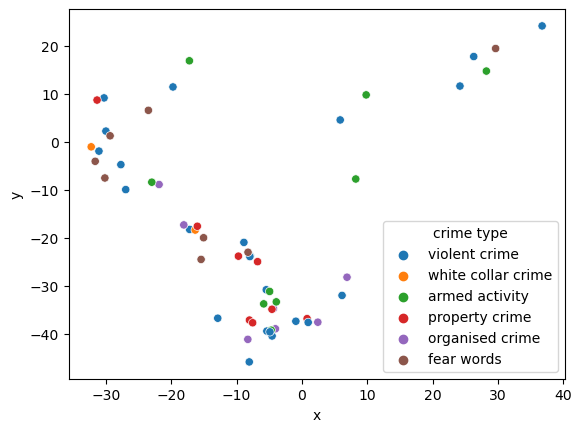

In [95]:
import seaborn as sns
sns.scatterplot(data=df_plot, x="x", y="y", hue="crime type")


In [96]:
# use k-nearest neighbors to classify fear words into certain categories
# for each word in fear words, find 5 closest points, see what maximum crime type of those points are
# see if there is a certain category that is more common to see surrounding fear related words
euc_dist = []
for f in fear_words_df['vectors']:
    dist_from_word = []
    for v in vector_crime_df['vectors']:
        dist = np.sqrt(np.sum(np.square(np.array(f) - np.array(v))))
        dist_from_word.append(dist)
    euc_dist.append(dist_from_word)


In [97]:
fear_words_df['crime word'].unique()

array(['horrified', 'shocked', 'horror', 'angry', 'scary', 'fear', 'mad',
       'worry'], dtype=object)

In [98]:
horror_list = euc_dist[2]
horrified_list = euc_dist[0]
fear_list = euc_dist[5]
worry_list = euc_dist[7]
shocked_list = euc_dist[1]
angry_list = euc_dist[3]
scary_list = euc_dist[4]
mad_list = euc_dist[6]


In [99]:
horror_closest_crimeword_indices = pd.DataFrame(horror_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[horror_closest_crimeword_indices]['crime type'].value_counts().idxmax()


'violent crime'

In [100]:
horrified_closest_crimeword_indices = pd.DataFrame(horrified_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[horrified_closest_crimeword_indices]['crime type'].value_counts().idxmax()


'violent crime'

In [101]:
fear_closest_crimeword_indices = pd.DataFrame(fear_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[fear_closest_crimeword_indices]['crime type'].value_counts().idxmax()


'violent crime'

In [102]:
worry_closest_crimeword_indices = pd.DataFrame(worry_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[worry_closest_crimeword_indices]['crime type'].value_counts().idxmax()


'violent crime'

In [103]:
shocked_closest_crimeword_indices = pd.DataFrame(shocked_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[shocked_closest_crimeword_indices]['crime type'].value_counts().idxmax()

'violent crime'

In [104]:
angry_closest_crimeword_indices = pd.DataFrame(angry_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[angry_closest_crimeword_indices]['crime type'].value_counts().idxmax()

'violent crime'

In [105]:
scary_closest_crimeword_indices = pd.DataFrame(scary_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[scary_closest_crimeword_indices]['crime type'].value_counts().idxmax()

'violent crime'

In [107]:
mad_closest_crimeword_indices = pd.DataFrame(mad_list).sort_values(by = 0).iloc[:5].index
vector_crime_df.iloc[mad_closest_crimeword_indices]['crime type'].value_counts().idxmax()

'property crime'

In [108]:
fear_crime_df = pd.DataFrame(columns = ['fear word'], data = fear_words_df['crime word'].unique())
fear_crime_df

,fear word
0,horrified
1,shocked
2,horror
3,angry
4,scary
5,fear
6,mad
7,worry


In [109]:
fear_crime_df['most proximate crime type'] = ['violent crime', 'violent crime',
                                             'violent crime', 'violent crime',
                                             'violent crime', 'violent crime',
                                             'property crime', 'violent crime']